# Homework 1 Problem 3
Please finish the following code and copy the nessary result to the report for the discussion

### Part 0, data generation function
We would like to first import some necessary Libraries for this task and then write down the data generation function as follow. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import *
from scipy.interpolate import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

def ftrue(x):
    return np.sin(x)
def generatedata(ndata,seed):
    rng = np.random.RandomState(seed)
    Xtrain = np.linspace(0,10,ndata)
    Ytrain = np.sin(Xtrain) + 0.1 * rng.randn(ndata)
    return Xtrain,Ytrain
Xtrain,Ytrain = generatedata(50,seed=1)


### Part 1, Visualize the data

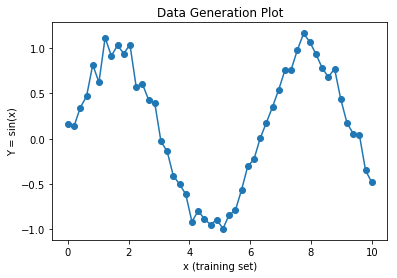

In [2]:
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtrain,Ytrain)
plt.xlabel('x (training set)')
plt.ylabel('Y = sin(x)')
plt.title('Data Generation Plot', fontsize = 12)
plt.savefig('K:/ASU docs/courses related docs/IEE598/Assignment/1/plots and results/q3plot1')

### Part 2, design matrix polynomial regression: Please finish this section
We would like to create the polynomial design matrix up to order k. 

**Input: **

- input vector: $x = (X_{1},X_{2},\cdots,X_{n})$

- model order k: 

**Output: **
- Model matrix:
$ \left[\begin{array}{cccc}
X_{1}^{1} & X_{1}^{2} & \cdots & X_{1}^{p}\\
X_{2}^{1} & X_{2}^{2} & \cdots & X_{2}^{p}\\
\vdots\\
X_{n}^{1} & X_{n}^{2} & \cdots & X_{n}^{p}
\end{array}\right]$

In [3]:
def polynomialfeatures(x,k):
    mat1=np.zeros(len(x)*k).reshape(len(x),k)
    for c in range(0,len(x)):
        #print(c)
        for d in range(1,k+1):
            #print(d)
            mat1[c][d-1]= np.array(x[c]**d)
    return(mat1)
#x1 = print(np.array(input("enter the x value:  ")))
#k1 = print(input("enter k value: "))
#polynomialfeatures(x1,k1)

#### Let's validate the result
Does your result seem correct?

In [4]:
x = np.array([1,2,3])
polynomialfeatures(x,3)

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.]])

### Part 3: Training and Testing Split , please finish this section
For this section, we would like to fit a linear regression model to the generated data with polynomial with the order $p$ from $1$ to $20$. We need to first to generate a set of testing data set to evaluate the algorithm, as in xtest, ytest. We would like to use the residual sum of square error to evaluate the performance of the algorithm

In [5]:
ntest = 1000
xtest,ytest = generatedata(ntest,seed=341)

SSE = np.zeros((20))
# We can define the 0 order polynomial as the mean prediction
SSE[0] = np.sum((ytest-np.mean(Ytrain))**2)
#print(SSE)
for p in range(1,20):
    # DIY , use our own function of polynomial features
    Xtrain1 = np.zeros((len(Xtrain),p))
    Xtrain1 = polynomialfeatures(Xtrain, p)
    Xtes1 = polynomialfeatures(xtest,p)
    XTrain1 = np.concatenate((np.ones((len(Xtrain),1)),Xtrain1),axis = 1)
    XTes1 = np.concatenate((np.ones((len(xtest),1)),Xtes1),axis = 1)
    beta_hat = np.linalg.solve(XTrain1.T.dot(XTrain1),XTrain1.T.dot(Ytrain))
    y_predicted = (XTes1.dot(beta_hat))
    
    SSE[p]= np.sum((ytest - (XTes1.dot(beta_hat)))**2)
    print(SSE[p])
print('The minimum value of SSE is: %s ' %min(SSE))
print('The 8th model gives out the least value for the SSE which is to be considered for the final model')

447.203074868
364.974563106
336.079424383
51.727934734
40.9367879382
11.3398618447
10.8728985931
10.6725394811
11.3267474098
11.4402607179
11.4370780225
11.4285844735
11.4614253799
11.4680016163
11.4976869125
11.5138516609
11.5546632086
11.5730006875
11.593765854
The minimum value of SSE is: 10.6725394811 
The 8th model gives out the least value for the SSE which is to be considered for the final model


#### Visualize the Testing accuracy

Text(0.5,1,'Variation in SSE')

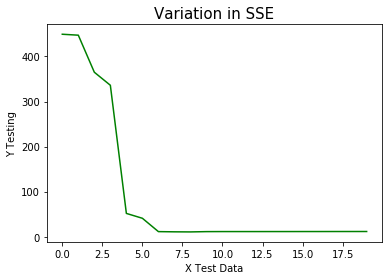

In [6]:
plt.plot(SSE,'green')
plt.ylabel('Y Testing')
plt.xlabel('X Test Data')
plt.title('Variation in SSE', fontsize = 15)

### Part 4: Bonus
(Bonus and open question): for this question, since we are simulating the example and we do know the true function. Can you use simulation to compute the bias and variance for different order of polynomial function? If so, please use simulation to estimate the bias and variance for polynomial model from order 1 to 20 and comment on the result. 

The bias is 140.146681 Variance is 0.001707 
The bias is 526.275286 Variance is 0.067423 
The bias is 526.275286 Variance is 0.089706 
The bias is 21.517190 Variance is 0.376214 
The bias is 21.517190 Variance is 0.387945 
The bias is 27.147612 Variance is 0.433090 
The bias is 27.147612 Variance is 0.433057 
The bias is 24.542073 Variance is 0.432900 
The bias is 24.542081 Variance is 0.432690 
The bias is 21.698966 Variance is 0.432510 
The bias is 21.700536 Variance is 0.432415 
The bias is 24.889831 Variance is 0.432754 
The bias is 24.911393 Variance is 0.432770 
The bias is 21.910284 Variance is 0.432783 
The bias is 17.619012 Variance is 0.431841 
The bias is 76.292613 Variance is 0.433991 
The bias is 81.100395 Variance is 0.404933 
The bias is 96.978525 Variance is 0.403730 
The bias is 65.947401 Variance is 0.398758 


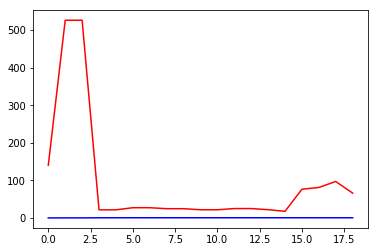

In [8]:
ntest = 1000
xtest,ytest = generatedata(ntest,seed=43)
Bias= []
empVar= []
empVar1= []
pred1 = np.zeros(len(Xtrain1))
for p in range(1,20):
   
    Xtrain1 = polynomialfeatures(Xtrain,p)
    Xtest1 = polynomialfeatures(xtest,p)
    
    y1 = Ytrain
    regr = LinearRegression()
    regr.fit(Xtrain1,Ytrain)
    pred1 = regr.predict(Xtest1)
    SSE[p]= np.sum((ytest - (regr.predict(Xtest1)))**2)
    variance = np.var(pred1)
    bias =((np.sum(regr.predict(Xtest1) - ftrue(polynomialfeatures(xtest,1)))/len(ytest)))
    biassqr = bias**2
    Bias.append(biassqr)
    
    var = (np.mean(np.sum(regr.predict(Xtest1) - (regr.predict(Xtest1)/1000)))/1000)**2
    empVar1.append(variance)
    empVar.append(var)
    
    
    print("The bias is %f" %biassqr, "Variance is %f " %variance)
    

plt.plot(range(19),empVar1, 'blue')
plt.plot(range(19),Bias, 'red')
    

### Part 5: Visualization of your final model
Please plot the final model that you would like to use for this problem.

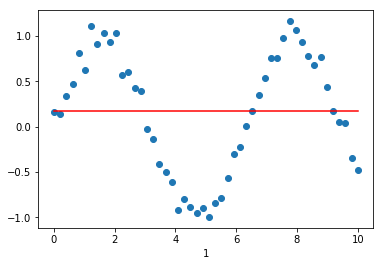

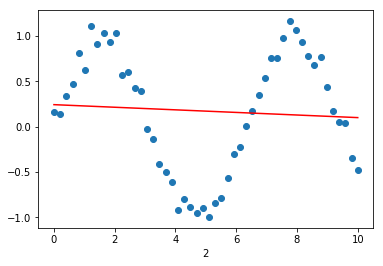

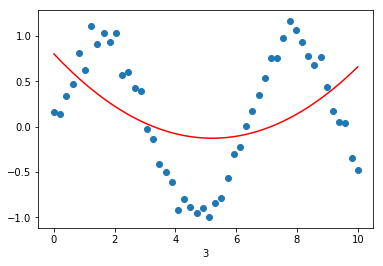

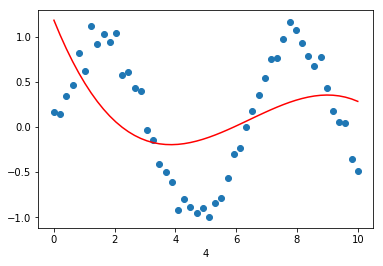

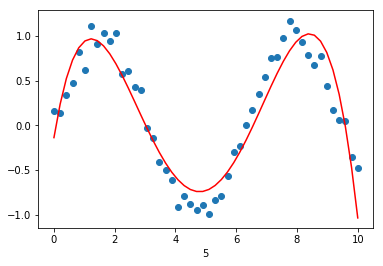

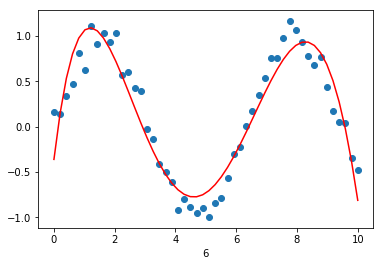

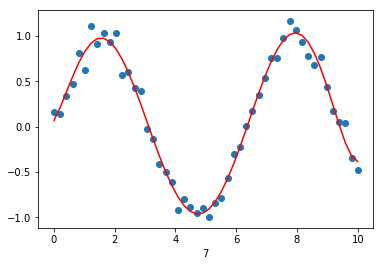

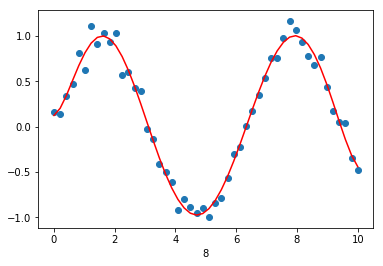

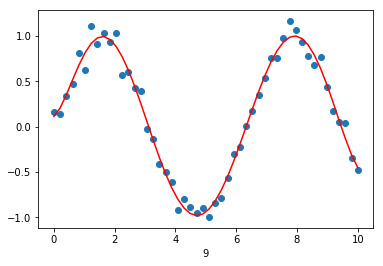

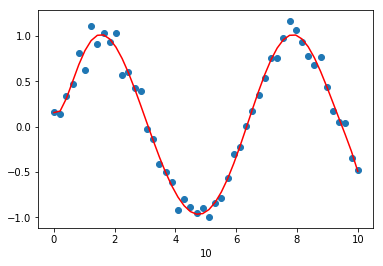

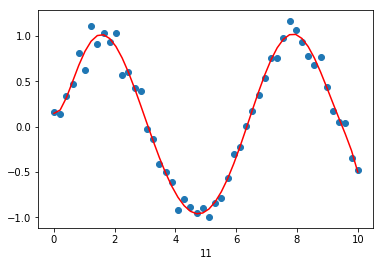

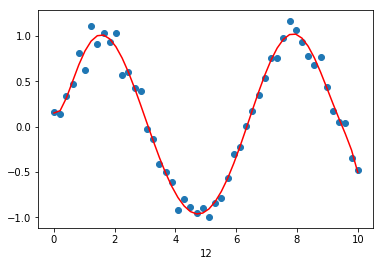

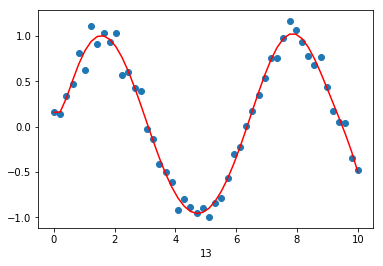

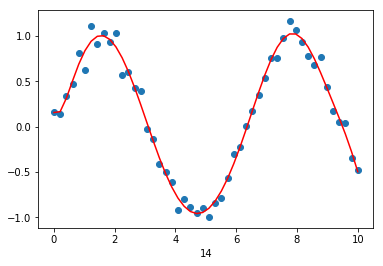

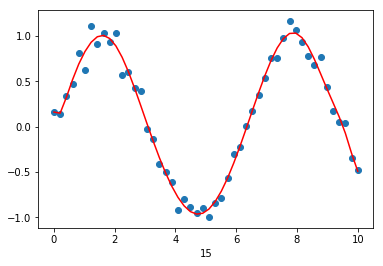

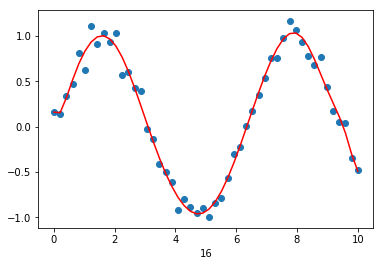

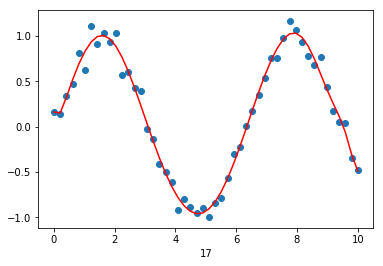

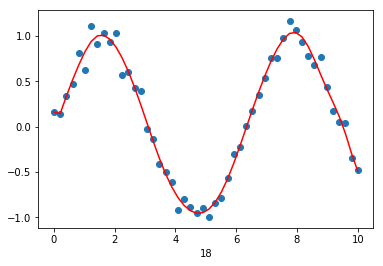

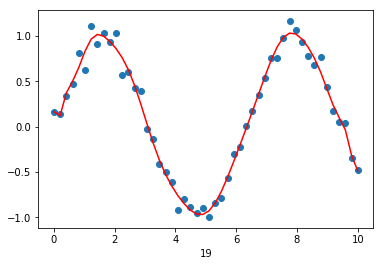

C:\Users\HETUL\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


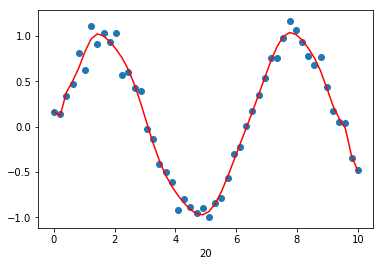

[  9.70920020e-11  -7.86236627e-09   2.80504044e-07  -5.67729153e-06
   6.78580210e-05  -3.84953365e-04  -1.68429652e-03   5.77018955e-02
  -6.19612555e-01   4.17135273e+00  -1.96658401e+01   6.70523467e+01
  -1.66080326e+02   2.95275948e+02  -3.66918420e+02   3.04896631e+02
  -1.58162468e+02   4.56384172e+01  -4.99921807e+00   1.66060471e-01]


C:\Users\HETUL\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


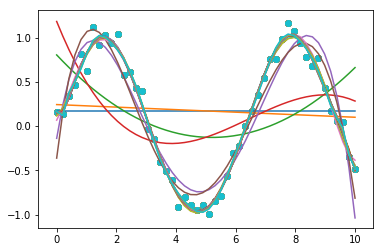

In [9]:
from scipy.interpolate import *
from matplotlib.pyplot import *
%matplotlib inline

for p in range(20):
    fit12 = np.polyfit(Xtrain,Ytrain,p)
    plt.scatter(Xtrain,Ytrain)
    plt.plot(Xtrain,np.polyval(fit12,Xtrain),'red')
    plt.xlabel(p+1)
    plt.show()
print(fit12)

for p in range(20):
    fit12 = np.polyfit(Xtrain,Ytrain,p)
    plt.scatter(Xtrain,Ytrain)
    plt.plot(Xtrain,np.polyval(fit12,Xtrain))
